## Project 1: Exploratory Data Analysis (EDA)

### Back Story

An email from a potential client:

> Vinny & Julia -
>
> It was great to meet with you and chat at the event where we recently met and had a nice chat. We’d love to take some next steps to see if working together is something that would make sense for both parties.
>
> As we mentioned, we are interested in harnessing the power of data and analytics to optimize the effectiveness of our street team work, which is a significant portion of our fundraising efforts.
>
> WomenTechWomenYes (WTWY) has an annual gala at the beginning of the summer each year. As we are new and inclusive organization, we try to do double duty with the gala both to fill our event space with individuals passionate about increasing the participation of women in technology, and to concurrently build awareness and reach.
>
> To this end we place street teams at entrances to subway stations. The street teams collect email addresses and those who sign up are sent free tickets to our gala.
>
> Where we’d like to solicit your engagement is to use MTA subway data, which as I’m sure you know is available freely from the city, to help us optimize the placement of our street teams, such that we can gather the most signatures, ideally from those who will attend the gala and contribute to our cause.
>
> The ball is in your court now—do you think this is something that would be feasible for your group? From there we can explore what kind of an engagement would make sense for all of us.
>
> Best,
>
> Karrine and Dahlia
>
> WTWY International




#### Data:

 * MTA Data (Google it!)
 * Additional data sources welcome!
  
#### Skills:

 * `python` and `pandas`
 * visualizations via Matplotlib & seaborn

#### Analysis:

 * Exploratory Data Analysis


#### Deliverable/communication:

 * Group presentation (4-5 people per) 
 * slide presentation
 * visual and oral communication in group presentations
 * organized project repository


We are very excited to see what you will learn and do for Project Benson!


In [1]:
import pandas as pd
import numpy as np
import math
import datetime

from datetime import datetime as dt

%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt 



**FIELD DESCRIPTION**

C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS


C/A      = Control Area (A002)
___
UNIT     = Remote Unit for a station (R051)
___
SCP      = Subunit Channel Position represents an specific address for a device (02-00-00)
___
STATION  = Represents the station name the device is located at
___
LINENAME = Represents all train lines that can be boarded at this station. Normally lines are represented by one character.  LINENAME 456NQR repersents train server for 4, 5, 6, N, Q, and R trains.
___
DIVISION = Represents the Line originally the station belonged to BMT, IRT, or IND
___
DATE     = Represents the date (MM-DD-YY)
___
TIME     = Represents the time (hh:mm:ss) for a scheduled audit event
___
DESc     = Represent the "REGULAR" scheduled audit event (Normally occurs every 4 hours)
           1. Audits may occur more that 4 hours due to planning, or troubleshooting activities. 
           2. Additionally, there may be a "RECOVR AUD" entry: This refers to a missed audit that was recovered.
___
ENTRIES  = The cumulative entry register value for a device
___
EXIST    = The cumulative exit register value for a device 


In [2]:
## Extract and read data from the source
#### initialise the number of weeks for the dataset
num_weeks = 4

#initialise the date for the first week of the dataset (week ending on start_date)
filedate = pd.Timestamp('2020-08-08 00:00:00')


#initialise the regex for the MTA turnstile url
filename_regex = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"

filelist = []

for numfiles in range (num_weeks):

    # create the appropriate filename for the week by linking the right format of the dates to turnstile_{}.txt
    filedate_str = str(filedate.year)[2:4] + str(filedate.month).zfill(2) + str(filedate.day).zfill(2)
    filename = filename_regex.format(filedate_str)

    # read the file and append it to the list of files to be concacated
    df = pd.read_csv(filename, parse_dates=['DATE'], keep_date_col=True)
    filelist.append(df)

    # advance to the next week
    filedate += pd.Timedelta(days=7)

df = pd.concat(filelist, axis=0, ignore_index=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841486 entries, 0 to 841485
Data columns (total 11 columns):
 #   Column                                                                Non-Null Count   Dtype         
---  ------                                                                --------------   -----         
 0   C/A                                                                   841486 non-null  object        
 1   UNIT                                                                  841486 non-null  object        
 2   SCP                                                                   841486 non-null  object        
 3   STATION                                                               841486 non-null  object        
 4   LINENAME                                                              841486 non-null  object        
 5   DIVISION                                                              841486 non-null  object        
 6   DATE                        

In [4]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-08-01,00:00:00,REGULAR,7439363,2529044
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-08-01,04:00:00,REGULAR,7439367,2529046
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-08-01,08:00:00,REGULAR,7439379,2529055
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-08-01,12:00:00,REGULAR,7439412,2529092
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-08-01,16:00:00,REGULAR,7439487,2529108


In [5]:
df.sample(20)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
449708,H027,R137,01-00-01,MYRTLE-WYCKOFF,LM,BMT,2020-08-19,04:00:00,REGULAR,7849066,7751993
269159,N094,R029,01-06-02,WORLD TRADE CTR,ACE23,IND,2020-08-13,04:00:00,REGULAR,1050285,289650
238241,G011,R312,00-00-03,W 8 ST-AQUARIUM,FQ,BMT,2020-08-12,04:00:00,REGULAR,1350428,426848
818132,R510,R090,00-03-00,39 AV,NQW,BMT,2020-08-23,04:00:00,REGULAR,146067,68604
349640,R160A,R164,00-00-00,66 ST-LINCOLN,1,IRT,2020-08-14,09:00:00,REGULAR,611662,600847
643432,B034,R264,01-06-01,OCEAN PKWY,Q,BMT,2020-08-25,08:00:00,REGULAR,3255232,448384
330396,PTH16,R550,01-00-02,LACKAWANNA,1,PTH,2020-08-08,01:18:57,REGULAR,79883,101225
147088,R178,R273,00-00-01,145 ST,1,IRT,2020-08-01,16:00:00,REGULAR,22492967,2903589
190793,R529,R208,00-06-00,103 ST-CORONA,7,IRT,2020-08-05,00:00:00,REGULAR,4429321,11472974
21073,C008,R099,00-06-02,DEKALB AV,BDNQR,BMT,2020-08-02,04:00:00,REGULAR,2651,5432


In [6]:
# Check the column headings
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [7]:
#Remove the extra spaces in the column headings
df.columns = [column.strip() for column in df.columns]

In [8]:
# Check column headings again.
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [9]:
# convert the date column from object to date time variate

df["DATE"]= pd.to_datetime(df["DATE"])
df['TIME'] = pd.to_datetime(df["TIME"]).dt.strftime('%H:%M')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841486 entries, 0 to 841485
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   C/A       841486 non-null  object        
 1   UNIT      841486 non-null  object        
 2   SCP       841486 non-null  object        
 3   STATION   841486 non-null  object        
 4   LINENAME  841486 non-null  object        
 5   DIVISION  841486 non-null  object        
 6   DATE      841486 non-null  datetime64[ns]
 7   TIME      841486 non-null  object        
 8   DESC      841486 non-null  object        
 9   ENTRIES   841486 non-null  int64         
 10  EXITS     841486 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 70.6+ MB


In [11]:
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-08-01,00:00,REGULAR,7439363,2529044
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-08-01,04:00,REGULAR,7439367,2529046
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-08-01,08:00,REGULAR,7439379,2529055
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-08-01,12:00,REGULAR,7439412,2529092
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-08-01,16:00,REGULAR,7439487,2529108
...,...,...,...,...,...,...,...,...,...,...,...
841481,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2020-08-28,05:00,REGULAR,5554,540
841482,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2020-08-28,09:00,REGULAR,5554,540
841483,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2020-08-28,13:00,REGULAR,5554,540
841484,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2020-08-28,17:00,REGULAR,5554,540


In [12]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique

Entries_df = df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE", "TIME"]).ENTRIES.count().reset_index()

#Search in descending order, any entries more than 1 is multiple entries.
Entries_df.sort_values("ENTRIES", ascending=False).head(5)



,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES
383380,N400A,R359,02-06-01,COURT SQ,2020-08-22,04:00,2
323170,N309A,R140,00-00-00,QUEENS PLAZA,2020-08-22,05:00,2
358918,N336,R158,00-00-02,KEW GARDENS,2020-08-22,05:03,2
382294,N400A,R359,02-03-01,COURT SQ,2020-08-22,04:00,2
372903,N343,R019,00-00-00,JAMAICA 179 ST,2020-08-22,16:00,2


In [13]:
"""since we identified double entries for stations Forest Hills 71 and Norwood Av, we check back the original
dataframe by filtering these 2 stations and understand why"""

mask = ((df["C/A"] == "N333A") & 
(df["UNIT"] == "R141") & 
(df["SCP"] == "00-00-00") & 
(df["STATION"] == "FOREST HILLS 71") &
(df["DATE"].dt.date == datetime.datetime(2020, 8, 26).date()))

df[mask].head()


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
711434,N333A,R141,00-00-00,FOREST HILLS 71,EFMR,IND,2020-08-26,01:00,REGULAR,1443526,2955419
711435,N333A,R141,00-00-00,FOREST HILLS 71,EFMR,IND,2020-08-26,05:00,REGULAR,1443526,2955420
711436,N333A,R141,00-00-00,FOREST HILLS 71,EFMR,IND,2020-08-26,05:00,RECOVR AUD,8,2
711437,N333A,R141,00-00-00,FOREST HILLS 71,EFMR,IND,2020-08-26,09:00,REGULAR,1443535,2955448
711438,N333A,R141,00-00-00,FOREST HILLS 71,EFMR,IND,2020-08-26,10:00,RECOVR AUD,8,82


In [14]:
mask = ((df["C/A"] == "J023") & 
(df["UNIT"] == "R436") & 
(df["SCP"] == "00-00-00") & 
(df["STATION"] == "NORWOOD AV") &
(df["DATE"].dt.date == datetime.datetime(2020, 8, 25).date()))

df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
665042,J023,R436,00-00-00,NORWOOD AV,JZ,BMT,2020-08-25,01:00,REGULAR,7365716,9734589
665043,J023,R436,00-00-00,NORWOOD AV,JZ,BMT,2020-08-25,05:00,REGULAR,7365729,9734593
665044,J023,R436,00-00-00,NORWOOD AV,JZ,BMT,2020-08-25,05:00,RECOVR AUD,7365728,9734593
665045,J023,R436,00-00-00,NORWOOD AV,JZ,BMT,2020-08-25,09:00,REGULAR,7365892,9734691
665046,J023,R436,00-00-00,NORWOOD AV,JZ,BMT,2020-08-25,13:00,REGULAR,7365944,9734776


In [15]:
# We identifed that double counting comes from the entry with DESC = "REOVR AUD". 
# Let's examine the EXITS and see if there are more stations with more than 1 exits

In [16]:
Exits_df = df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE", "TIME"]).EXITS.count().reset_index()

#Search in descending order, any exits more than 1 is multiple exits.
Exits_df.sort_values("EXITS", ascending=False).head(5)

,C/A,UNIT,SCP,STATION,DATE,TIME,EXITS
383380,N400A,R359,02-06-01,COURT SQ,2020-08-22,04:00,2
323170,N309A,R140,00-00-00,QUEENS PLAZA,2020-08-22,05:00,2
358918,N336,R158,00-00-02,KEW GARDENS,2020-08-22,05:03,2
382294,N400A,R359,02-03-01,COURT SQ,2020-08-22,04:00,2
372903,N343,R019,00-00-00,JAMAICA 179 ST,2020-08-22,16:00,2


In [17]:
#Get rid of duplicate data
df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE" ,"TIME"], inplace=True)

In [18]:
#Check again

Entries_df = df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE", "TIME"]).ENTRIES.count().reset_index()
Entries_df.sort_values("ENTRIES", ascending=False).head(5)




,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2020-08-01,00:00,1
560880,R134,R272,01-06-00,28 ST,2020-08-27,13:00,1
560870,R134,R272,01-06-00,28 ST,2020-08-25,21:00,1
560871,R134,R272,01-06-00,28 ST,2020-08-26,01:00,1
560872,R134,R272,01-06-00,28 ST,2020-08-26,05:00,1


In [19]:
Exits_df = df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE", "TIME"]).EXITS.count().reset_index()
Exits_df.sort_values("EXITS", ascending=False).head(5)

,C/A,UNIT,SCP,STATION,DATE,TIME,EXITS
0,A002,R051,02-00-00,59 ST,2020-08-01,00:00,1
560880,R134,R272,01-06-00,28 ST,2020-08-27,13:00,1
560870,R134,R272,01-06-00,28 ST,2020-08-25,21:00,1
560871,R134,R272,01-06-00,28 ST,2020-08-26,01:00,1
560872,R134,R272,01-06-00,28 ST,2020-08-26,05:00,1


In [20]:
#Since entries and exits are cumulative, we want to find the daily entries and exits. 
#We will work the entries and exits seperately before merging the two dataframes

Entries_df_daily = (df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False).ENTRIES.last())

In [21]:
Entries_df_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,2020-08-01,7439621
1,A002,R051,02-00-00,59 ST,2020-08-02,7439837
2,A002,R051,02-00-00,59 ST,2020-08-03,7440260
3,A002,R051,02-00-00,59 ST,2020-08-04,7440601
4,A002,R051,02-00-00,59 ST,2020-08-05,7441060


In [22]:
Entries_df_daily[["PREV_DATE", "PREV_ENTRIES"]] = Entries_df_daily.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1))

<ipython-input-22-d4909c1c3051>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Entries_df_daily[["PREV_DATE", "PREV_ENTRIES"]] = Entries_df_daily.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1))


In [23]:
Entries_df_daily

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,2020-08-01,7439621,NaT,NaN
1,A002,R051,02-00-00,59 ST,2020-08-02,7439837,2020-08-01,7439621.0
2,A002,R051,02-00-00,59 ST,2020-08-03,7440260,2020-08-02,7439837.0
3,A002,R051,02-00-00,59 ST,2020-08-04,7440601,2020-08-03,7440260.0
4,A002,R051,02-00-00,59 ST,2020-08-05,7441060,2020-08-04,7440601.0
...,...,...,...,...,...,...,...,...
137991,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2020-08-24,5554,2020-08-23,5554.0
137992,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2020-08-25,5554,2020-08-24,5554.0
137993,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2020-08-26,5554,2020-08-25,5554.0
137994,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2020-08-27,5554,2020-08-26,5554.0


In [24]:
# Drop the rows for the earliest date in the df with the NA values
Entries_df_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [25]:
#Check for any anomalies in the entries, such as negative counters or unusual large spikes in the entries
#before calculating the daily entries

Entries_df_daily[Entries_df_daily["ENTRIES"] < Entries_df_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1065,A011,R080,01-03-00,57 ST-7 AV,2020-08-02,885657880,2020-08-01,885657942.0
1066,A011,R080,01-03-00,57 ST-7 AV,2020-08-03,885657725,2020-08-02,885657880.0
1067,A011,R080,01-03-00,57 ST-7 AV,2020-08-04,885657567,2020-08-03,885657725.0
1068,A011,R080,01-03-00,57 ST-7 AV,2020-08-05,885657416,2020-08-04,885657567.0
1069,A011,R080,01-03-00,57 ST-7 AV,2020-08-06,885657271,2020-08-05,885657416.0


In [26]:
#Deepdive into original dataframe for the particular entries to understand better

mask = ((df["C/A"] == "A011") & 
(df["UNIT"] == "R080") & 
(df["SCP"] == "01-03-00") & 
(df["STATION"] == "57 ST-7 AV") &
(df["DATE"].dt.date == datetime.datetime(2020, 8, 23).date()))

df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
625248,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,2020-08-23,00:00,REGULAR,885655218,489796217
625249,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,2020-08-23,04:00,REGULAR,885655211,489796212
625250,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,2020-08-23,08:00,REGULAR,885655209,489796173
625251,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,2020-08-23,12:00,REGULAR,885655202,489796102
625252,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,2020-08-23,16:00,REGULAR,885655184,489796002


In [27]:
Entries_df_daily[Entries_df_daily["ENTRIES"] < Entries_df_daily["PREV_ENTRIES"]].groupby(["C/A", "UNIT", "SCP", "STATION"]).size()

C/A   UNIT  SCP       STATION        
A011  R080  01-03-00  57 ST-7 AV         27
A025  R023  01-03-01  34 ST-HERALD SQ    27
A049  R088  02-05-00  CORTLANDT ST       13
A064  R311  00-03-00  BOWERY              1
A066  R118  00-00-00  CANAL ST           27
                                         ..
R610  R057  00-03-04  ATL AV-BARCLAY      1
R612  R057  01-00-03  ATL AV-BARCLAY      1
R621  R060  00-06-00  EASTN PKWY-MUSM     1
R622  R123  00-00-00  FRANKLIN AV        27
R730  R431  00-00-04  EASTCHSTER/DYRE    27
Length: 89, dtype: int64

In [28]:
# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!

def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter



In [29]:
Entries_df_daily["DAILY_ENTRIES"] = Entries_df_daily.apply(get_daily_counts, axis=1, max_counter=6000)

408 4676418.0
372 4971113.0
262512 283192.0
327762 262512.0
327680 3133.0
524332 327680.0
5177693 17134751.0
186 12153427.0
279 8291685.0
40 519474.0
1786788 1402138.0
524311 102677421.0
127 7326231.0
500 3115313.0
233 7197.0
524292 2226894.0
391 22530.0
983451 4659872.0
187 7855959.0
517 1786225.0
585 9899.0
1397029 3004522.0
1804857 1397778.0
102 47591.0
50 42277.0
8 32886.0
1035 19378.0
124 142245.0
165 15033.0
46 243756.0
63 17563.0
28 80186.0
61561 88986.0
10823 1779.0
410 234745.0
103 73471.0
12 837109.0
19 55129.0
262146 67110893.0
524291 262169.0
19 52447.0
1565891 868116.0
12 631238.0
590197 967542.0
66 123635.0
481 329439.0
98 10628.0
128 1589490.0
112 1210137.0
130 128542.0


In [30]:
Entries_df_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,2020-08-02,7439837,2020-08-01,7439621.0,216.0
2,A002,R051,02-00-00,59 ST,2020-08-03,7440260,2020-08-02,7439837.0,423.0
3,A002,R051,02-00-00,59 ST,2020-08-04,7440601,2020-08-03,7440260.0,341.0
4,A002,R051,02-00-00,59 ST,2020-08-05,7441060,2020-08-04,7440601.0,459.0
5,A002,R051,02-00-00,59 ST,2020-08-06,7441573,2020-08-05,7441060.0,513.0


In [31]:
#now we do the same to filter out the NA for EXITs

In [32]:
Exits_df_daily = (df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False).EXITS.last())

In [33]:
Exits_df_daily.head()

,C/A,UNIT,SCP,STATION,DATE,EXITS
0,A002,R051,02-00-00,59 ST,2020-08-01,2529122
1,A002,R051,02-00-00,59 ST,2020-08-02,2529186
2,A002,R051,02-00-00,59 ST,2020-08-03,2529371
3,A002,R051,02-00-00,59 ST,2020-08-04,2529469
4,A002,R051,02-00-00,59 ST,2020-08-05,2529631


In [34]:
Exits_df_daily[["PREV_DATE", "PREV_EXITS"]] = Exits_df_daily.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "EXITS"].apply(lambda grp: grp.shift(1))

<ipython-input-34-d10f12867084>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Exits_df_daily[["PREV_DATE", "PREV_EXITS"]] = Exits_df_daily.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "EXITS"].apply(lambda grp: grp.shift(1))


In [35]:
Exits_df_daily

,C/A,UNIT,SCP,STATION,DATE,EXITS,PREV_DATE,PREV_EXITS
0,A002,R051,02-00-00,59 ST,2020-08-01,2529122,NaT,NaN
1,A002,R051,02-00-00,59 ST,2020-08-02,2529186,2020-08-01,2529122.0
2,A002,R051,02-00-00,59 ST,2020-08-03,2529371,2020-08-02,2529186.0
3,A002,R051,02-00-00,59 ST,2020-08-04,2529469,2020-08-03,2529371.0
4,A002,R051,02-00-00,59 ST,2020-08-05,2529631,2020-08-04,2529469.0
...,...,...,...,...,...,...,...,...
137991,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2020-08-24,539,2020-08-23,539.0
137992,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2020-08-25,540,2020-08-24,539.0
137993,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2020-08-26,540,2020-08-25,540.0
137994,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2020-08-27,540,2020-08-26,540.0


In [36]:
# Drop the rows for the earliest date in the df with the NA values
Exits_df_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [37]:
#Check for any anomalies in the entries, such as negative counters or unusual large spikes in the entries
#before calculating the daily entries

Exits_df_daily[Exits_df_daily["EXITS"] < Exits_df_daily["PREV_EXITS"]].head()

,C/A,UNIT,SCP,STATION,DATE,EXITS,PREV_DATE,PREV_EXITS
1065,A011,R080,01-03-00,57 ST-7 AV,2020-08-02,489807229,2020-08-01,489807493.0
1066,A011,R080,01-03-00,57 ST-7 AV,2020-08-03,489806624,2020-08-02,489807229.0
1067,A011,R080,01-03-00,57 ST-7 AV,2020-08-04,489806101,2020-08-03,489806624.0
1068,A011,R080,01-03-00,57 ST-7 AV,2020-08-05,489805493,2020-08-04,489806101.0
1069,A011,R080,01-03-00,57 ST-7 AV,2020-08-06,489804881,2020-08-05,489805493.0


In [38]:
#Deepdive into original dataframe for the particular entries to understand better

mask = ((df["C/A"] == "A011") & 
(df["UNIT"] == "R080") & 
(df["SCP"] == "01-03-00") & 
(df["STATION"] == "57 ST-7 AV") &
(df["DATE"].dt.date == datetime.datetime(2020, 8, 23).date()))

df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
625248,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,2020-08-23,00:00,REGULAR,885655218,489796217
625249,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,2020-08-23,04:00,REGULAR,885655211,489796212
625250,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,2020-08-23,08:00,REGULAR,885655209,489796173
625251,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,2020-08-23,12:00,REGULAR,885655202,489796102
625252,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,2020-08-23,16:00,REGULAR,885655184,489796002


In [39]:
#Check how many exits have the same problem
Exits_df_daily[Exits_df_daily["EXITS"] < Exits_df_daily["PREV_EXITS"]].groupby(["C/A", "UNIT", "SCP", "STATION"]).size()

C/A   UNIT  SCP       STATION        
A011  R080  01-03-00  57 ST-7 AV         27
A064  R311  00-03-00  BOWERY              1
B012  R196  00-00-00  PROSPECT PARK      27
B024  R211  00-05-01  KINGS HWY           1
D008  R392  00-03-00  18 AV              27
                                         ..
R523  R147  00-00-04  61 ST WOODSIDE     27
R610  R057  00-03-04  ATL AV-BARCLAY      1
R612  R057  01-00-03  ATL AV-BARCLAY      1
R621  R060  00-06-00  EASTN PKWY-MUSM     1
R622  R123  00-00-00  FRANKLIN AV        27
Length: 85, dtype: int64

In [40]:
# If counter is > 6000, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!

def get_daily_counts(row, max_counter):
    counter = row["EXITS"] - row["PREV_EXITS"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["EXITS"], row["PREV_EXITS"])
        counter = min(row["EXITS"], row["PREV_EXITS"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter



In [41]:
Exits_df_daily["DAILY_EXITS"] = Exits_df_daily.apply(get_daily_counts, axis=1, max_counter=6000)

272 5913711.0
166 1726293.0
65954 85288.0
65652 12187.0
292 65726.0
328347 22686813.0
448 8831790.0
498 5618421.0
98 2724373.0
1485 417605.0
1 16954543.0
301 7895.0
487 9397213.0
39 299630.0
1096 24115.0
23 6531731.0
582 37324.0
570 5676472.0
518 25897868.0
314 694385.0
2485 1275572.0
201 9986.0
800 92485.0
39 33239.0
137 266067.0
401 508722.0
101 12315.0
78 303518.0
38 101904.0
52076 10195.0
204 19735.0
595925 19536.0
745 1220048.0
16 23679.0
10 353041.0
0 59584.0
65536 16777216.0
0 65536.0
39 71014.0
2132 4488646.0
9 1327380.0
536 263347.0
99 266946.0
226 67023.0
19 227946.0
27 479982.0
146 65866.0


In [42]:
Exits_df_daily.head()

,C/A,UNIT,SCP,STATION,DATE,EXITS,PREV_DATE,PREV_EXITS,DAILY_EXITS
1,A002,R051,02-00-00,59 ST,2020-08-02,2529186,2020-08-01,2529122.0,64.0
2,A002,R051,02-00-00,59 ST,2020-08-03,2529371,2020-08-02,2529186.0,185.0
3,A002,R051,02-00-00,59 ST,2020-08-04,2529469,2020-08-03,2529371.0,98.0
4,A002,R051,02-00-00,59 ST,2020-08-05,2529631,2020-08-04,2529469.0,162.0
5,A002,R051,02-00-00,59 ST,2020-08-06,2529807,2020-08-05,2529631.0,176.0


In [43]:
# now we get the daily entries and exits, flatten the data by resetting the index
# and merge the two together, and sum them up to get daily traffic.

In [44]:
mta_entries = (Entries_df_daily.groupby(['STATION','DATE'])['DAILY_ENTRIES'].sum().reset_index())
mta_entries.head()


,STATION,DATE,DAILY_ENTRIES
0,1 AV,2020-08-02,2695.0
1,1 AV,2020-08-03,4589.0
2,1 AV,2020-08-04,3909.0
3,1 AV,2020-08-05,4883.0
4,1 AV,2020-08-06,5126.0


In [45]:
mta_exits = (Exits_df_daily.groupby(['STATION','DATE'])['DAILY_EXITS'].sum().reset_index())
mta_exits.head()


,STATION,DATE,DAILY_EXITS
0,1 AV,2020-08-02,3037.0
1,1 AV,2020-08-03,5917.0
2,1 AV,2020-08-04,5551.0
3,1 AV,2020-08-05,7010.0
4,1 AV,2020-08-06,7145.0


In [46]:
mta_entries_exits = pd.merge(mta_entries, mta_exits, how='outer')
mta_entries_exits.head()

,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS
0,1 AV,2020-08-02,2695.0,3037.0
1,1 AV,2020-08-03,4589.0,5917.0
2,1 AV,2020-08-04,3909.0,5551.0
3,1 AV,2020-08-05,4883.0,7010.0
4,1 AV,2020-08-06,5126.0,7145.0


In [47]:
mta_entries_exits['TRAFFIC'] = mta_entries_exits['DAILY_ENTRIES'] + mta_entries_exits['DAILY_EXITS']
mta_entries_exits['WEEKDAY'] = mta_entries_exits['DATE'].dt.day_name()
mta_entries_exits['WEEKDAY_INDEX'] = mta_entries_exits['DATE'].dt.weekday+1

In [48]:
mta_entries_exits.head(10)

,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS,TRAFFIC,WEEKDAY,WEEKDAY_INDEX
0,1 AV,2020-08-02,2695.0,3037.0,5732.0,Sunday,7
1,1 AV,2020-08-03,4589.0,5917.0,10506.0,Monday,1
2,1 AV,2020-08-04,3909.0,5551.0,9460.0,Tuesday,2
3,1 AV,2020-08-05,4883.0,7010.0,11893.0,Wednesday,3
4,1 AV,2020-08-06,5126.0,7145.0,12271.0,Thursday,4
5,1 AV,2020-08-07,5124.0,7124.0,12248.0,Friday,5
6,1 AV,2020-08-08,3702.0,4983.0,8685.0,Saturday,6
7,1 AV,2020-08-09,2902.0,3533.0,6435.0,Sunday,7
8,1 AV,2020-08-10,4540.0,6774.0,11314.0,Monday,1
9,1 AV,2020-08-11,4946.0,7162.0,12108.0,Tuesday,2


In [49]:
stations_daily_traffic = mta_entries_exits[['STATION', 'DATE', 'TRAFFIC']]
stations_daily_traffic.head()

,STATION,DATE,TRAFFIC
0,1 AV,2020-08-02,5732.0
1,1 AV,2020-08-03,10506.0
2,1 AV,2020-08-04,9460.0
3,1 AV,2020-08-05,11893.0
4,1 AV,2020-08-06,12271.0


In [50]:
# then get top 10 stations by the volume of traffic for this week
# we take the sum across all days to define this)
#why need to reset index to sort values????   

top10_stations = stations_daily_traffic.groupby(['STATION'])['TRAFFIC'].sum().reset_index()

#sort for the top 10 stations              
top10_stations = top10_stations.sort_values(by='TRAFFIC',ascending=False).round().head(10)
top10_stations

,STATION,TRAFFIC
61,34 ST-PENN STA,1488816.0
59,34 ST-HERALD SQ,1255450.0
9,125 ST,1143560.0
68,42 ST-PORT AUTH,1040908.0
110,86 ST,1028105.0
233,GRD CNTRL-42 ST,1022478.0
14,14 ST-UNION SQ,992839.0
46,23 ST,888585.0
217,FLUSHING-MAIN,830935.0
226,FULTON ST,818059.0


In [51]:
#now we know which stations has the highest traffic. 
#Next we select the top 10 stations and split the traffic into days and see which days tend to have more traffic.

#use the top10_stations as a filter
selection = top10_stations['STATION']
selection = list(selection)
selection

['34 ST-PENN STA',
 '34 ST-HERALD SQ',
 '125 ST',
 '42 ST-PORT AUTH',
 '86 ST',
 'GRD CNTRL-42 ST',
 '14 ST-UNION SQ',
 '23 ST',
 'FLUSHING-MAIN',
 'FULTON ST']

In [52]:
top10_stations_traffic = mta_entries_exits[mta_entries_exits.STATION.isin(selection)].round()
top10_stations_traffic


,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS,TRAFFIC,WEEKDAY,WEEKDAY_INDEX
243,125 ST,2020-08-02,10880.0,16373.0,27253.0,Sunday,7
244,125 ST,2020-08-03,19205.0,25278.0,44483.0,Monday,1
245,125 ST,2020-08-04,16108.0,21375.0,37483.0,Tuesday,2
246,125 ST,2020-08-05,20438.0,27554.0,47992.0,Wednesday,3
247,125 ST,2020-08-06,21324.0,28130.0,49454.0,Thursday,4
...,...,...,...,...,...,...,...
6307,GRD CNTRL-42 ST,2020-08-24,19575.0,24703.0,44278.0,Monday,1
6308,GRD CNTRL-42 ST,2020-08-25,20829.0,25890.0,46719.0,Tuesday,2
6309,GRD CNTRL-42 ST,2020-08-26,21219.0,26558.0,47777.0,Wednesday,3
6310,GRD CNTRL-42 ST,2020-08-27,20770.0,26559.0,47329.0,Thursday,4


In [53]:
top10_stations_weekday = top10_stations_traffic.groupby(['STATION', 'WEEKDAY_INDEX'])['TRAFFIC'].mean().round().reset_index()
top10_stations_weekday

,STATION,WEEKDAY_INDEX,TRAFFIC
0,125 ST,1,44962.0
1,125 ST,2,44368.0
2,125 ST,3,46252.0
3,125 ST,4,47418.0
4,125 ST,5,48595.0
...,...,...,...
65,GRD CNTRL-42 ST,3,44742.0
66,GRD CNTRL-42 ST,4,45404.0
67,GRD CNTRL-42 ST,5,44229.0
68,GRD CNTRL-42 ST,6,23469.0


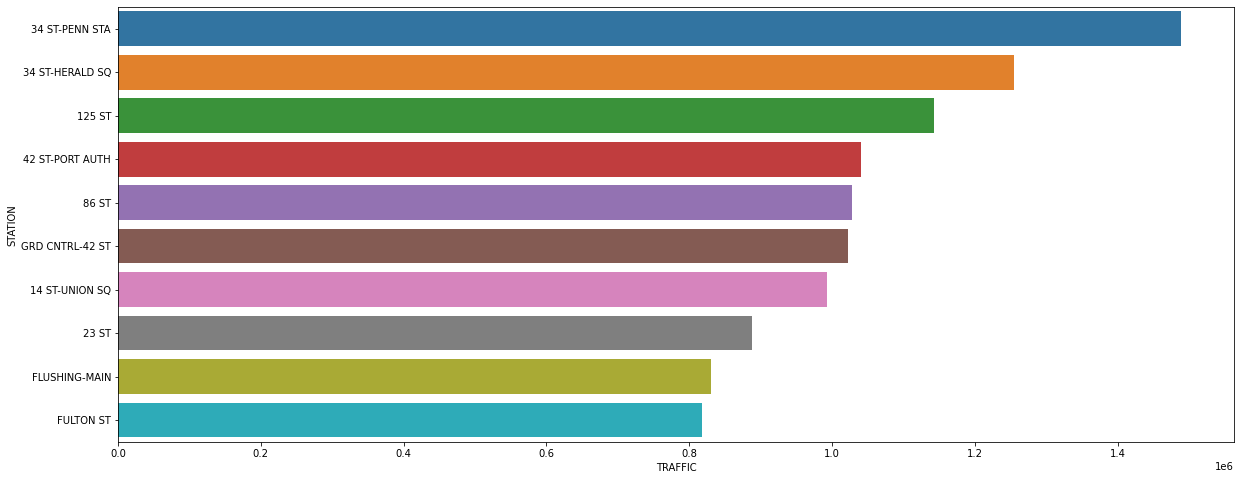

In [54]:
plt.figure(figsize=(20,8))
sns.barplot(x = 'TRAFFIC',y='STATION',data = top10_stations, ci=None);

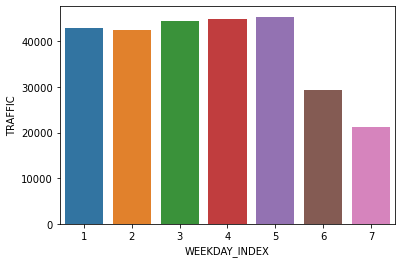

In [55]:
sns.barplot(x = 'WEEKDAY_INDEX',y='TRAFFIC',data = top10_stations_weekday, ci=None);

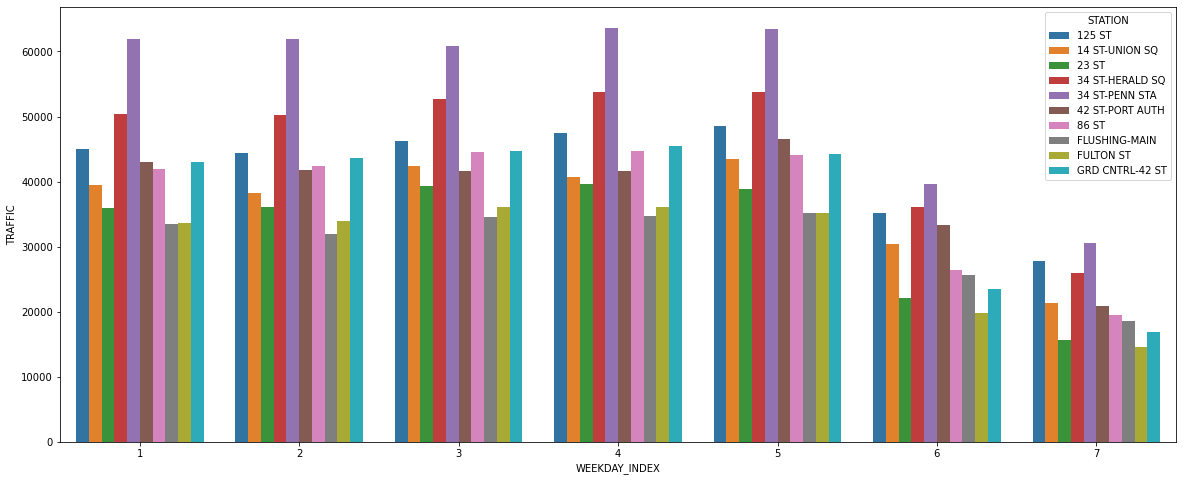

In [56]:
plt.figure(figsize=(20,8))
sns.barplot(x='WEEKDAY_INDEX', y="TRAFFIC" ,hue="STATION", data=top10_stations_weekday, ci=None)

In [57]:
#sns.relplot(x = 'WEEKDAY_INDEX',y='TRAFFIC',data = top10_stations_weekday
 #           , kind = "line", col = "STATION")

In [58]:
#data = top10_stations_traffic.groupby(['STATION','WEEKDAY'])['TRAFFIC'].mean().round()
#data = top10_stations_traffic.groupby(['STATION', 'WEEKDAY_INDEX'])['TRAFFIC'].mean().round().reset_index()
#data
#data = top10_stations_weekday
#g = sns.FacetGrid(data, col='STATION', sharex=True, sharey=True)
#g.map(sns.distplot, 'WEEKDAY_INDEX',norm_hist=False)


In [59]:
#plt.figure(figsize=(20,8))
#sns.heatmap(data,cmap='coolwarm_r',annot=True);